In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

2024-11-18 11:50:59.618559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 11:50:59.640485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 11:50:59.647160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 11:50:59.663950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 11:51:00.606040: W tensorflow/compiler/tf2

In [2]:
train_ds="/home/ad/adarsh/work/ai/dataset/tomatoleafdisease/tomato/train"
test_ds="/home/ad/adarsh/work/ai/dataset/tomatoleafdisease/tomato/val"

In [3]:
batch_size=32
img_size=224

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  
test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


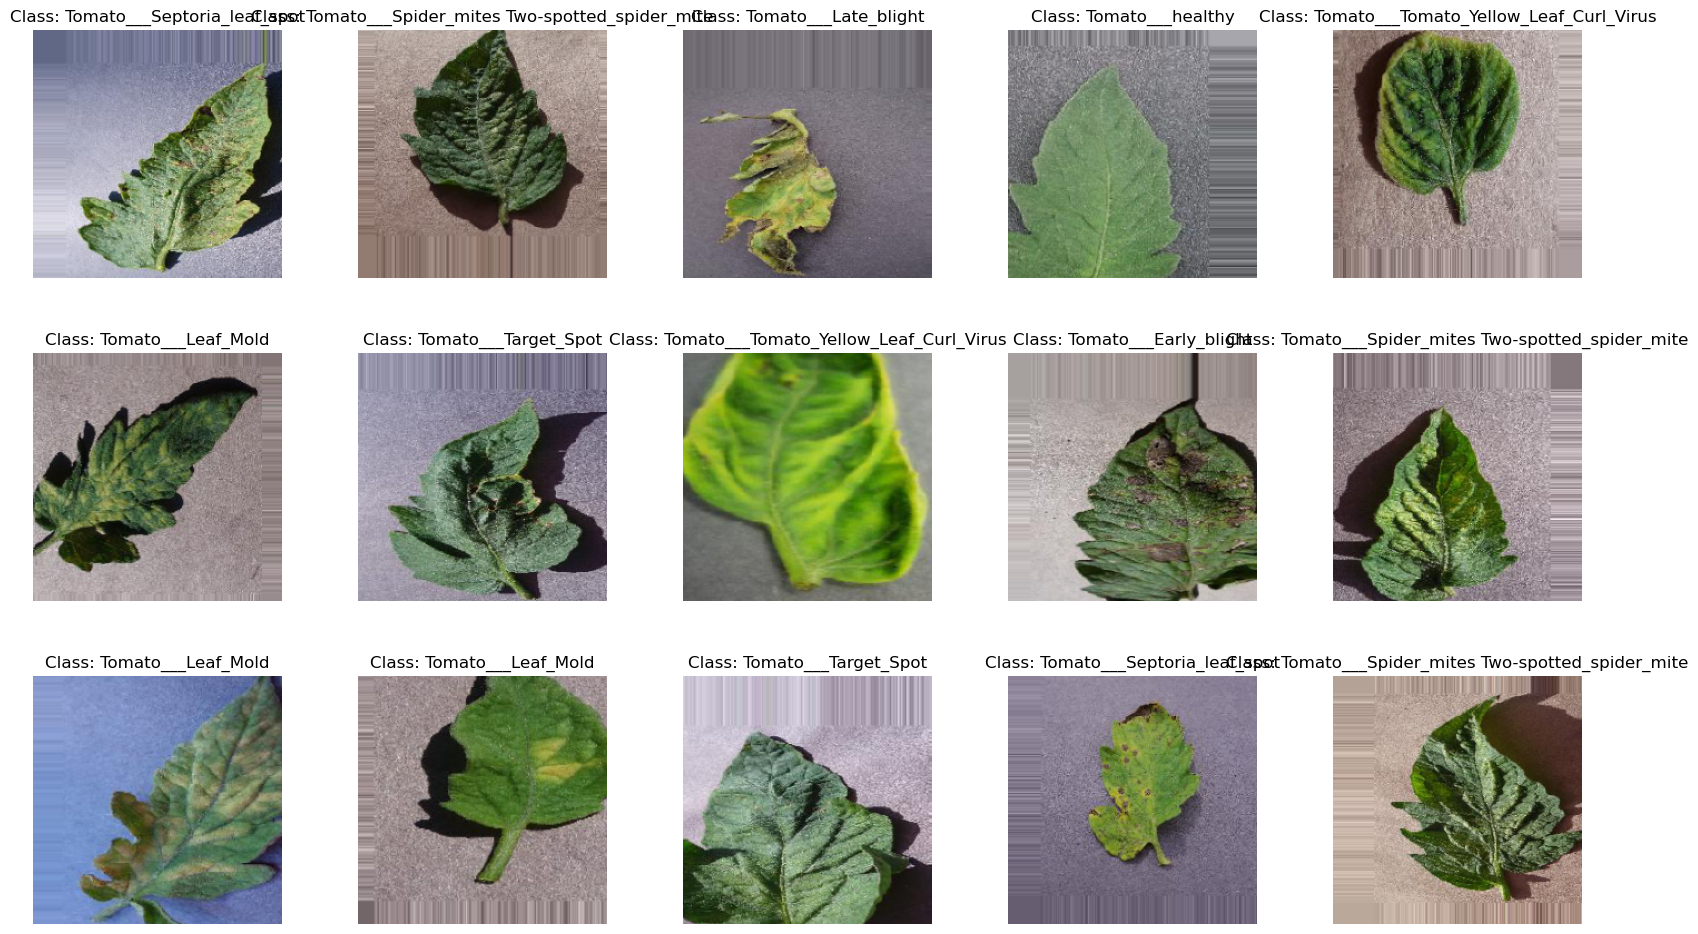

In [5]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
img= train_generator[0]
print(img)

In [8]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels


(32, 224, 224, 3)
(32, 10)


In [9]:
print(len(train_generator))
print(len(test_ds))

313
60


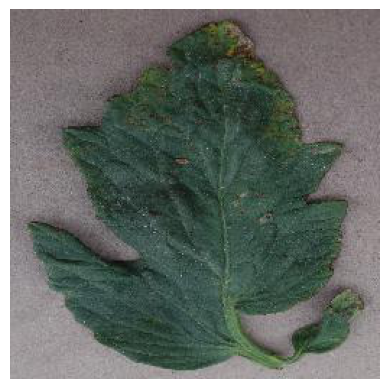

In [10]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/home/ad/adarsh/work/ai/dataset/tomatoleafdisease/tomato/val/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes = 10

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [17]:
model = mobilenet((224, 224, 3))

/tmp/ipykernel_43297/3571985242.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history =model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15


/home/ad/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-15 12:47:49.589159: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-11-15 12:47:49.658531: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-11-15 12:47:49.681836: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-11-15 12:47:49.706557: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-11-15 12:47:49.735871: W ex

313/313 ━━━━━━━━━━━━━━━━━━━━ 902s 3s/step - accuracy: 0.4202 - loss: 2.1670 - val_accuracy: 0.4160 - val_loss: 4.1853
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 865s 3s/step - accuracy: 0.7342 - loss: 0.8290 - val_accuracy: 0.5580 - val_loss: 2.7274
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 849s 3s/step - accuracy: 0.8361 - loss: 0.5141 - val_accuracy: 0.4530 - val_loss: 5.0629
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 847s 3s/step - accuracy: 0.8655 - loss: 0.4244 - val_accuracy: 0.6940 - val_loss: 1.5968
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 852s 3s/step - accuracy: 0.8959 - loss: 0.3239 - val_accuracy: 0.7210 - val_loss: 1.2990
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 868s 3s/step - accuracy: 0.9099 - loss: 0.3005 - val_accuracy: 0.3400 - val_loss: 6.6347
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 879s 3s/step - accuracy: 0.9067 - loss: 0.2950 - val_accuracy: 0.7780 - val_loss: 1.0685
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 863s 3s/step - accuracy: 0.9169 - loss: 0.2804 - val_accuracy: 0.860

In [21]:
n_categories = len(os.listdir('/home/ad/adarsh/work/ai/dataset/tomatoleafdisease/tomato/train'))# number of categories print(n_categories)
n_categories

10

In [52]:
# Path to the training dataset
dataset_path = '/home/ad/adarsh/work/ai/dataset/tomatoleafdisease/tomato/train'

# List categories (folder names) in the dataset directory
categories = os.listdir(dataset_path)

# Print the categories
print("Categories in the dataset:")
for category in categories:
    print(category)

# Optionally, store the count of categories
n_categories = len(categories)
print(f"\nNumber of categories: {n_categories}")

Categories in the dataset:
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___healthy
Tomato___Septoria_leaf_spot
Tomato___Bacterial_spot
Tomato___Leaf_Mold
Tomato___Late_blight
Tomato___Early_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Spider_mites Two-spotted_spider_mite

Number of categories: 10


In [22]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.5367,1.542353,0.416,4.185277
1,0.7732,0.707122,0.558,2.727370
2,0.8409,0.501079,0.453,5.062918
3,0.8771,0.394316,0.694,1.596759
4,0.8943,0.330631,0.721,1.298954


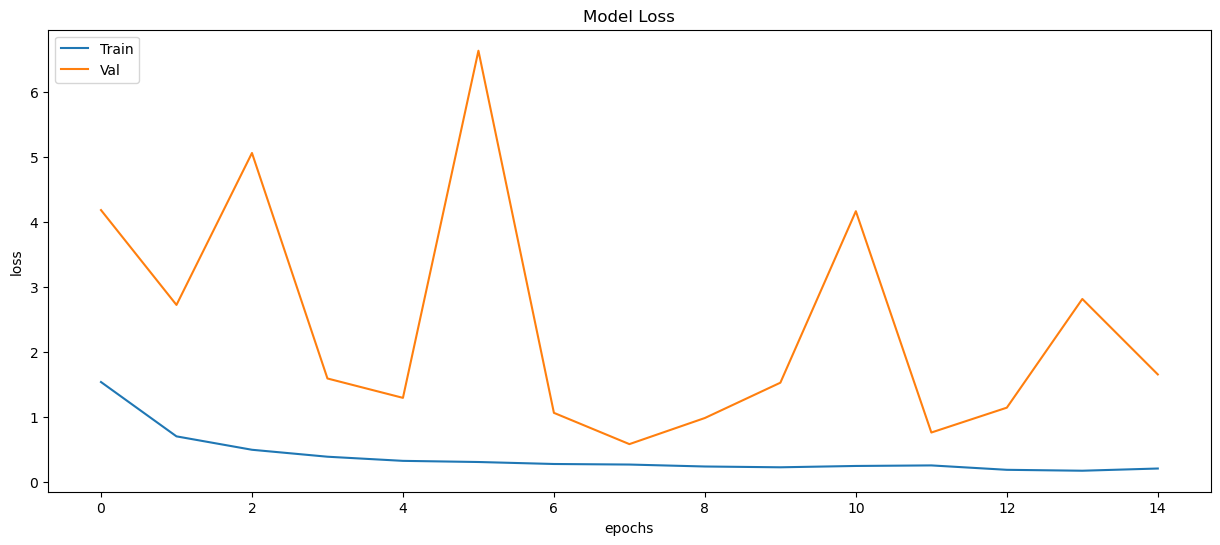

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

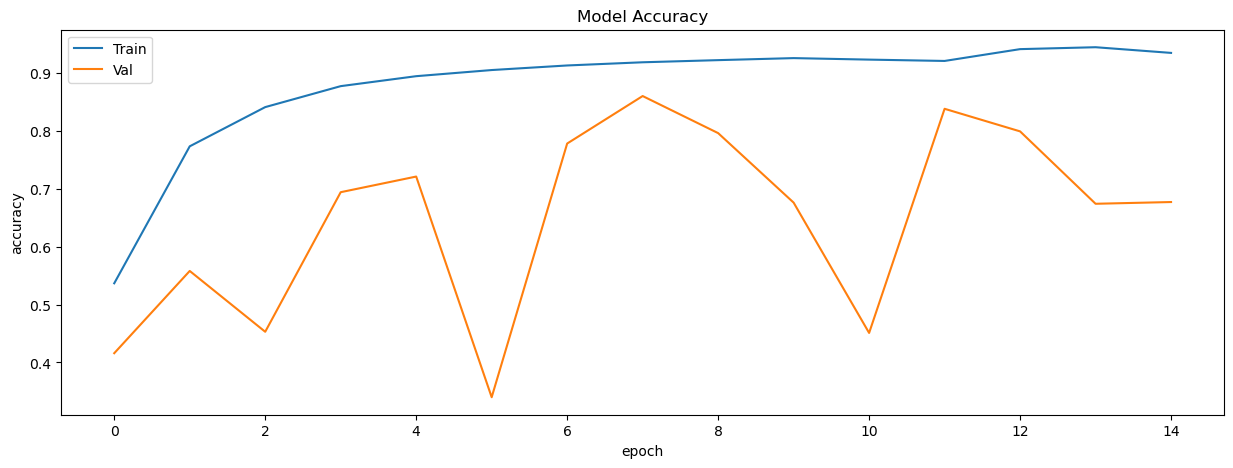

In [24]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 501ms/step


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.33      0.49       100
           1       0.36      0.96      0.52       100
           2       0.93      0.37      0.53       100
           3       0.75      0.84      0.79       100
           4       0.97      0.31      0.47       100
           5       0.70      0.94      0.80       100
           6       0.57      0.78      0.66       100
           7       0.99      0.87      0.93       100
           8       1.00      0.37      0.54       100
           9       0.86      1.00      0.93       100

    accuracy                           0.68      1000
   macro avg       0.81      0.68      0.67      1000
weighted avg       0.81      0.68      0.67      1000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


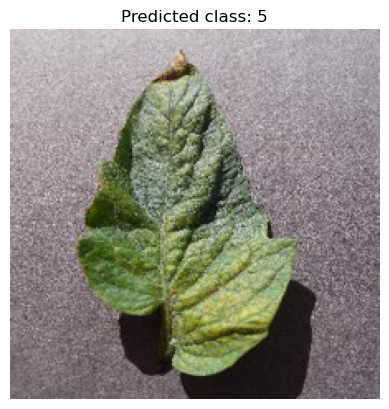

In [40]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/home/ad/adarsh/work/ai/tomatoleafdisease/test'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [ ]:
model.export('saved_model')  # Save as a TensorFlow SavedModel

In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model('/home/ad/adarsh/work/ai/tomatoleafdisease/saved_model')
input_shape = (1,224,224,3)
def representative_dataset_gen():
    for _ in range(100):
        data = np.random.rand(1, 300, 300, 3)
        input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
        yield [input_data]

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.experimental_new_converter = True

converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

quantized_tflite_model = converter.convert()



open('quant_model_mob.tflite' , "wb").write(quantized_tflite_model)

W0000 00:00:1731922575.805935    4521 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1731922575.805955    4521 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-11-18 15:06:15.806173: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:06:15.816189: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-18 15:06:15.816217: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:06:15.901489: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-18 15:06:16.338199: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:06:16.460968: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load 

3522232

In [5]:
import tensorflow as tf

# Load your SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model("/home/ad/adarsh/work/ai/tomatoleafdisease/saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Provide representative dataset
def representative_data_gen():
    for _ in range(100):
        yield [tf.random.uniform(shape=(1, 224, 224, 3), minval=0, maxval=255, dtype=tf.float32)]

converter.representative_dataset = representative_data_gen
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

# Save the re-quantized model
with open("quant_model_int8_optimized.tflite", "wb") as f:
    f.write(tflite_model)


W0000 00:00:1731922214.147267    4521 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1731922214.147287    4521 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-11-18 15:00:14.147509: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:00:14.155732: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-11-18 15:00:14.155756: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:00:14.239037: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-11-18 15:00:14.674199: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /home/ad/adarsh/work/ai/tomatoleafdisease/saved_model
2024-11-18 15:00:14.792806: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load 